#Title: Multiple-Objective Routing Path Optimisation

#Introduction

In this project, we focused on routing optimisation for vehicles on a motorway. The objective is to enhance Internet connectivity in vehicles by using a relay system, where cars act as relay nodes to transmit signals to neighboring cars, ultimately reaching a base station (BS).

The optimisation problem involves two crucial metrics: end-to-end data transmission rate and end-to-end latency. The motorway has two base stations, BS-1 and BS-2, situated at opposite ends. End-to-end latency is defined as the cumulative delay across each link in the routing path such that the delay between two lingks is 50 ms, while the end-to-end data transmission rate is determined by the minimum transmission rate among the links.

Furthermore,  A predefined table in the problem outlines the relationship between distance and transmission rate, establishing the conditions under which links can be established. Notably, if the distance between two cars exceeds 6000 meters, no connection is possible, resulting in a transmission rate of 0.

The assignment introduces a twin-objective optimisation problem that seeks to find a routing path with the maximum end-to-end data transmission rate and the minimum end-to-end latency for each car, considering access to either BS-1 or BS-2. To address this problem, we have implemented two optimisation algorithms **(Dijkstra's Algorithm and A-star algorithm)** in Python.

# Methodology

In this assignment two above discussed algorithms are implemented from scratch and efforts are made to optimise the output on basis of objectives of the problem. For that below mentioned methods are followed:
* Objective of the problem is defined.
*Perform data analysis
* Perform data processing
* Read the algorithms that can be used to solve the problem
* Decided two approaches
* Learnt about those algorithms through the available research papers and codes
* Modified the approaches on basis of the objectives
* Fit the algorithms on objective functions
* Discuss the results
* Concluded the research on basis of learnings
* Suggested future implementation of the approach

# Defining Objective

The objective of the problem is to find an optimal path where we have to maximise the transmission rate and minimise the latency, let us consider:

R(min)= transmission rate of the path P.

R(max)= max(R(min))

L(total) = Total Latency of the path P.

**Objective function = R(max) / L(total)**




#Global Function

Define Global functions that can be used by both the Algorithms to optimise the code.

## Import required libraries

In [ ]:
import pandas as pd
import math
import heapq
import matplotlib.pyplot as plt
import numpy as np
import json


## Data Processing

The available dataset consists of position coordinates of 100 cars and there is additional information of the coordinates of two basestations. The basestations BS-1 and BS-2 are converted into integer form 101 and 102 and included into the dataset.

Then, by using the available relation between distance and transmission rate, the transmission rate is calculated.

In [ ]:
# Read dataset from data_file.csv
data_file_path = "/content/data_file - Copy.csv"
vehicle_data = pd.read_csv(data_file_path)

# Adding Base Stations
base_stations_data = pd.DataFrame([
    {'No.': 101, 'x': -1, 'y': -1},  # BS-1
    {'No.': 102, 'x': 56325, 'y': 9}  # BS-2
])

# Appending base station data to the existing dataframe
vehicle_data = pd.concat([vehicle_data, base_stations_data])

# Extract unique integer node values including base stations
unique_nodes = vehicle_data['No.'].dropna().astype(int).unique()

# Filter dataframe to contain only valid 'No.' values
vehicle_data = vehicle_data[vehicle_data['No.'].isin(unique_nodes)]

# Calculate distance between two vehicle coordinates
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Create graph based on vehicle coordinates and distance criteria
def create_graph(vehicle_data):
    graph = {node: {} for node in unique_nodes}
    for i, node1_row in vehicle_data.iterrows():
        node1 = int(node1_row['No.'])
        x1, y1 = node1_row['x'], node1_row['y']
        for j, node2_row in vehicle_data.iterrows():
            node2 = int(node2_row['No.'])
            x2, y2 = node2_row['x'], node2_row['y']
            if node1 != node2:
                distance = calculate_distance(x1, y1, x2, y2)
                if distance < 6000:
                    transmission_rate = 0
                    if distance >= 4000:
                        transmission_rate = 1
                    elif distance >= 3000:
                        transmission_rate = 2
                    elif distance >= 2000:
                        transmission_rate = 4
                    elif distance >= 1000:
                        transmission_rate = 6
                    elif distance >= 500:
                        transmission_rate = 8
                    else:
                        transmission_rate = 10
                    if transmission_rate != 0:
                        graph[node1][node2] = {'transmission_rate': transmission_rate, 'latency': 50}
    return graph

To achieve the objective of the problem, below mentioned two algorithms are implemented:

* Dijkstra's Algorithm

* A-star algorithm

#Dijkstra's Algorithm


Dijkstra's algorithm is introduced in 1959 by E. W. Dijkstra in the paper (Dijkstra, 1959) titled, "A Note on Two Problems in Connexion with Graphs".

This algorithm aims to find the shortest path between two given points (P and Q) in a network. It does so by progressively building the minimal paths from the starting point (P) to other nodes until it reaches the destination (Q). The algorithm categorises nodes and branches into sets based on their relationship to the known minimal paths.

The process involves three sets:

A) nodes for which the minimum path from P is known, added in increasing order of path length;

B) nodes from which the next node for set A is selected;

C) remaining nodes.

Similarly, branches are categorised into sets:

I) branches occurring in the minimal paths from P to nodes in set A;

II) branches from which the next branch for set I is selected;

III) remaining branches.

The algorithm starts with all nodes in set C and all branches in set II. It then iteratively transfers nodes and branches between sets based on evaluating their impact on path lengths. The goal is to eventually transfer the destination node (Q) to set A, indicating that the shortest path has been found.

##Defining Fitness Function for the Dijkstra's algorithm

In [ ]:
# Define fitness function
def fitness_function(path, graph):
    transmission_rates = [graph[path[i]][path[i+1]]['transmission_rate'] for i in range(len(path)-1)]
    end_to_end_rate = min(transmission_rates) if transmission_rates else 0
    path_latency = (len(path)-1) * 50  # Calculate path latency
    return end_to_end_rate, path_latency

# Implementation of Dijkstra's algorithm

In [ ]:
# Dijkstra's algorithm to find paths with optimised objectives
def find_optimal_path(graph, source, destinations):
    max_end_to_end_rate = float('-inf')
    optimal_path = None
    optimal_end_to_end_rate = float('-inf')
    optimal_latency = float('inf')

    for destination in destinations:
        visited = set()
        priority_queue = [(-float('inf'), float('inf'), source, [])]

        while priority_queue:
            _, _, current_node, path = heapq.heappop(priority_queue)

            if current_node == destination:
                end_to_end_rate, path_latency = fitness_function(path + [destination], graph)
                if max_end_to_end_rate < end_to_end_rate or (max_end_to_end_rate == end_to_end_rate and optimal_latency > path_latency):
                    max_end_to_end_rate = end_to_end_rate
                    optimal_path = path + [destination]
                    optimal_end_to_end_rate = end_to_end_rate
                    optimal_latency = path_latency
                break

            if current_node not in visited:
                visited.add(current_node)
                for neighbor in graph[current_node]:
                    heapq.heappush(priority_queue, (-graph[current_node][neighbor]['transmission_rate'], graph[current_node][neighbor]['latency'], neighbor, path + [current_node]))

    return optimal_end_to_end_rate, optimal_path, optimal_latency

## Showing Output for all 100 cars

In [ ]:
# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(vehicle_data)

    # Perform algorithm for each car node as the source
    car_nodes = [node for node in vehicle_graph if node not in [101, 102]]  # Exclude base stations
    destinations = [101, 102]  # Destinations are base stations

    results = []

    for source_node in car_nodes:
        max_rate, optimal_path, optimal_latency = find_optimal_path(vehicle_graph, source_node, destinations)

        # Extract routing path from the optimal path
        routing_path = [(f"Car-{optimal_path[i]}", f"{vehicle_graph[optimal_path[i]][optimal_path[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path)-1)]

        # Include the base station in the routing path
        routing_path.append((f"BS-{optimal_path[-1]}", f"{vehicle_graph[optimal_path[-2]][optimal_path[-1]]['transmission_rate']} Mbps"))

        result = {
                "SourceNode": f"Car-{source_node}",
                "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
                "EndToEndTransmissionRate": f"{max_rate} Mbps"
            }

        results.append(result)

    # Convert results to JSON using the custom encoder
    results_json = json.dumps(results, indent=2)
    print(results_json)


print("*****"*20)

# Save the JSON output to a file
output_file_path = "output_Dijkstra.json"
with open(output_file_path, "w") as output_file:
    json.dump(results, output_file, indent=2)

# Displaying a message indicating the file has been saved
print(f"JSON output saved to: {output_file_path}")



[
  {
    "SourceNode": "Car-1",
    "RoutingPath": "(BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "10 Mbps"
  },
  {
    "SourceNode": "Car-2",
    "RoutingPath": "(Car-1, 10 Mbps), (BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-3",
    "RoutingPath": "(Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-4",
    "RoutingPath": "(Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-5",
    "RoutingPath": "(Car-4, 10 Mbps), (Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-6",
    "RoutingPath": "(Car-5, 10 Mbps), (Car-4, 10 Mbps), (Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-7",
 

## Function for Visualisation

In [ ]:
# Function to visualise the path on a plot
def visualise_path(vehicle_data, path):
    plt.figure(figsize=(6,6))

    # Plot base stations
    bs_data = vehicle_data[vehicle_data['No.'].isin([101, 102])]
    plt.scatter(bs_data['x'], bs_data['y'], color='red', marker='o', label='Base Station')

    # Plot vehicle nodes
    plt.scatter(vehicle_data['x'], vehicle_data['y'], color='blue', marker='o', label='Vehicle Node')

    # Plot the optimal path
    path_data = vehicle_data[vehicle_data['No.'].isin(path)]
    plt.plot(path_data['x'], path_data['y'], color='green', linestyle='-', linewidth=2, markersize=8, label='Optimal Path')

    # Annotate each node with its ID
    for i, row in vehicle_data.iterrows():
        plt.annotate(int(row['No.']), (row['x'], row['y']), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title('Optimal Path Visualisation')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

## Printing output for each car

Car: 1
Optimal Path: [1, 101]
Max Transmission Rate: 10 Mbps
Latency: 50 ms


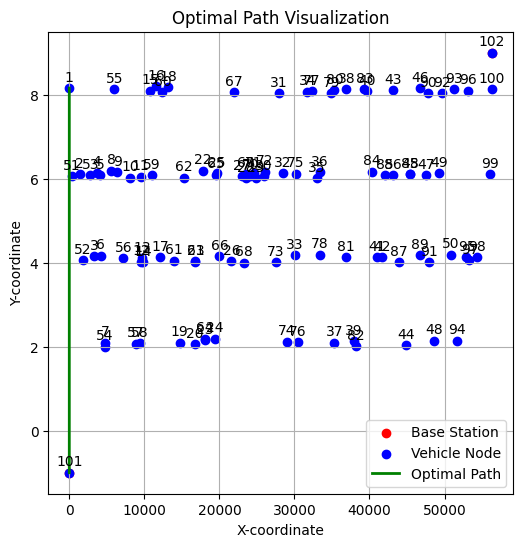

In [ ]:
# Perform algorithm for a specific car
selected_source_node = 1
max_rate_to_visualise, optimal_path_to_visualise, optimal_latency_to_visualise = find_optimal_path(vehicle_graph, selected_source_node, [101, 102])

print(f"Car: {selected_source_node}")
# Check if optimal_path is not None:
if optimal_path_to_visualise is not None:
    print(f"Optimal Path: {optimal_path_to_visualise}")
    print(f"Max Transmission Rate: {max_rate_to_visualise} Mbps")
    print(f"Latency: {optimal_latency_to_visualise} ms")

    # Visualise the optimal path
    visualise_path(vehicle_data, optimal_path_to_visualise)
else:
    print("No valid path found to any base station.")

Car: 15
Optimal Path: [15, 11, 57, 10, 56, 9, 55, 8, 7, 54, 6, 5, 4, 3, 2, 1, 101]
Max Transmission Rate: 6 Mbps
Latency: 800 ms


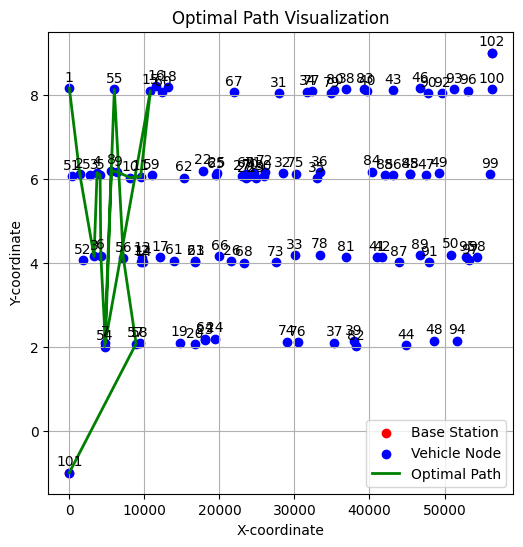

In [ ]:
# Perform algorithm for a specific car
selected_source_node = 15
max_rate_to_visualise, optimal_path_to_visualise, optimal_latency_to_visualise = find_optimal_path(vehicle_graph, selected_source_node, [101, 102])

print(f"Car: {selected_source_node}")
# Check if optimal_path is not None:
if optimal_path_to_visualise is not None:
    print(f"Optimal Path: {optimal_path_to_visualise}")
    print(f"Max Transmission Rate: {max_rate_to_visualise} Mbps")
    print(f"Latency: {optimal_latency_to_visualise} ms")

    # Visualise the optimal path
    visualise_path(vehicle_data, optimal_path_to_visualise)
else:
    print("No valid path found to any base station.")

Car: 65
Optimal Path: [65, 22, 20, 62, 19, 61, 18, 60, 16, 15, 11, 57, 10, 56, 9, 55, 8, 7, 54, 6, 5, 4, 3, 2, 1, 101]
Max Transmission Rate: 6 Mbps
Latency: 1250 ms


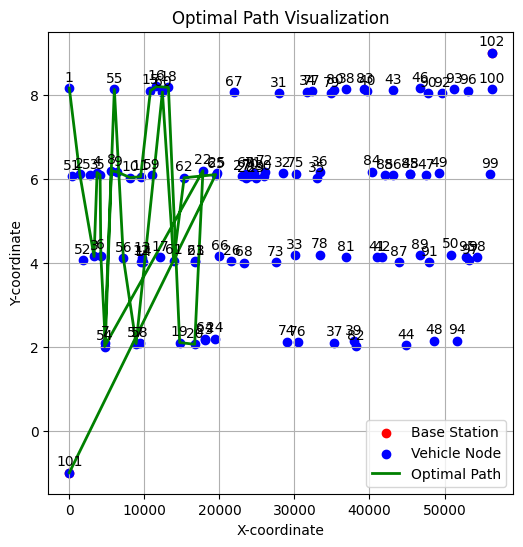

In [ ]:
# Perform algorithm for a specific car
selected_source_node = 65
max_rate_to_visualise, optimal_path_to_visualise, optimal_latency_to_visualise = find_optimal_path(vehicle_graph, selected_source_node, [101, 102])

print(f"Car: {selected_source_node}")
# Check if optimal_path is not None:
if optimal_path_to_visualise is not None:
    print(f"Optimal Path: {optimal_path_to_visualise}")
    print(f"Max Transmission Rate: {max_rate_to_visualise} Mbps")
    print(f"Latency: {optimal_latency_to_visualise} ms")

    # Visualise the optimal path
    visualise_path(vehicle_data, optimal_path_to_visualise)
else:
    print("No valid path found to any base station.")

#A-Star Algorithm (A*)

The A-Star algorithm is introduced in 1968 by Peter Hart, Nils Nilsson and Bertram Raphael of Stanford Research Institute in the paper (Hart et al., 1968) titled, "A Formal Basis for the Heuristic Determination of Minimum Cost Paths".

The paper discusses the problem of finding a minimum cost path through a graph. It contrasts two traditional approaches—mathematical and heuristic—and proposes an algorithm, "A-Star", that combines both by incorporating information from the problem domain. The algorithm uses an evaluation function to make informed decisions about node expansion, aiming to find optimal paths efficiently. The paper proves the admissibility of A-Star and, under certain assumptions, its optimality.

Here's a high-level overview of how A* works:

**Initialisation:**

Initialise the start node.
Set the cost from the start node to itself as zero.
Estimate the cost from the start node to the goal using the heuristic function.

**Priority Queue:**

Use a priority queue to store nodes, ordered by the total cost (the sum of the cost to reach the node from the start and the estimated cost to reach the goal from that node).
Enqueue the start node with its total cost.

**Exploration:**

While the priority queue is not empty:
Dequeue the node with the lowest total cost.
If this node is the goal, the algorithm terminates, and the path is reconstructed.
Otherwise, mark the node as visited and expand its neighbors.

**Neighbor Expansion:**

For each unvisited neighbor:

Calculate the cost to reach that neighbor from the start (known cost).
Estimate the cost to reach the goal from that neighbor using the heuristic function.

Calculate the total cost.

If the neighbor is not in the priority queue or the new total cost is lower than the existing cost, enqueue the neighbor with the new cost.

**Path Reconstruction:**

Once the goal node is reached, reconstruct the path from the start to the goal by backtracking through the parent nodes.


## Defining Heuristic function for A-Star algorithm

In [ ]:
# Define heuristic function (Euclidean distance to destination)
def heuristic(node1, node2):
    x1, y1 = vehicle_data[vehicle_data['No.'] == node1][['x', 'y']].values[0]
    x2, y2 = vehicle_data[vehicle_data['No.'] == node2][['x', 'y']].values[0]
    return calculate_distance(x1, y1, x2, y2)


## Implementation of A-Star algorithm

In [ ]:
# A* algorithm to find paths with optimised objectives
def find_optimal_path_astar(graph, source, destinations):
    max_end_to_end_rate = float('-inf')
    optimal_path = None
    optimal_end_to_end_rate = float('-inf')
    optimal_latency = float('inf')

    for destination in destinations:
        visited = set()
        priority_queue = [(heuristic(source, destination), source, [])]

        while priority_queue:
            _, current_node, path = heapq.heappop(priority_queue)

            if current_node == destination:
                end_to_end_rate, path_latency = fitness_function(path + [destination], graph)
                if max_end_to_end_rate < end_to_end_rate or (max_end_to_end_rate == end_to_end_rate and optimal_latency > path_latency):
                    max_end_to_end_rate = end_to_end_rate
                    optimal_path = path + [destination]
                    optimal_end_to_end_rate = end_to_end_rate
                    optimal_latency = path_latency
                break

            if current_node not in visited:
                visited.add(current_node)
                for neighbor in graph[current_node]:
                    heapq.heappush(priority_queue, (heuristic(neighbor, destination) + graph[current_node][neighbor]['transmission_rate'], neighbor, path + [current_node]))

    return optimal_end_to_end_rate, optimal_path, optimal_latency


## Showing A-Star's Output for all 100 cars

In [ ]:
# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(vehicle_data)

    # Perform algorithm for each car node as the source
    car_nodes = [node for node in vehicle_graph if node not in [101, 102]]  # Exclude base stations
    destinations = [101, 102]  # Destinations are base stations

    results = []

    for source_node in car_nodes:
        max_rate, optimal_path, optimal_latency = find_optimal_path_astar(vehicle_graph, source_node, destinations)

        # Extract routing path from the optimal path
        routing_path = [(f"Car-{optimal_path[i]}", f"{vehicle_graph[optimal_path[i]][optimal_path[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path)-1)]

        # Include the base station in the routing path
        routing_path.append((f"BS-{optimal_path[-1]}", f"{vehicle_graph[optimal_path[-2]][optimal_path[-1]]['transmission_rate']} Mbps"))

        result = {
                "SourceNode": f"Car-{source_node}",
                "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
                "EndToEndTransmissionRate": f"{max_rate} Mbps"
            }

        results.append(result)

    # Convert results to JSON using the custom encoder
    results_json = json.dumps(results, indent=2)
    print(results_json)


print("*****"*20)

# Save the JSON output to a file
output_file_path = "output_AStar.json"
with open(output_file_path, "w") as output_file:
    json.dump(results, output_file, indent=2)

# Display a message indicating the file has been saved
print(f"JSON output saved to: {output_file_path}")



[
  {
    "SourceNode": "Car-1",
    "RoutingPath": "(BS-101, 10 Mbps)",
    "EndToEndTransmissionRate": "10 Mbps"
  },
  {
    "SourceNode": "Car-2",
    "RoutingPath": "(BS-101, 6 Mbps)",
    "EndToEndTransmissionRate": "6 Mbps"
  },
  {
    "SourceNode": "Car-3",
    "RoutingPath": "(BS-101, 2 Mbps)",
    "EndToEndTransmissionRate": "2 Mbps"
  },
  {
    "SourceNode": "Car-4",
    "RoutingPath": "(BS-101, 2 Mbps)",
    "EndToEndTransmissionRate": "2 Mbps"
  },
  {
    "SourceNode": "Car-5",
    "RoutingPath": "(BS-101, 1 Mbps)",
    "EndToEndTransmissionRate": "1 Mbps"
  },
  {
    "SourceNode": "Car-6",
    "RoutingPath": "(BS-101, 1 Mbps)",
    "EndToEndTransmissionRate": "1 Mbps"
  },
  {
    "SourceNode": "Car-7",
    "RoutingPath": "(BS-101, 1 Mbps)",
    "EndToEndTransmissionRate": "1 Mbps"
  },
  {
    "SourceNode": "Car-8",
    "RoutingPath": "(BS-101, 1 Mbps)",
    "EndToEndTransmissionRate": "1 Mbps"
  },
  {
    "SourceNode": "Car-9",
    "RoutingPath": "(Car-2, 6 Mbps), 

## Visualisation of path

In [ ]:
# Function to visualise the path on a plot
def visualise_path_astar(vehicle_data, path):
    plt.figure(figsise=(6, 6))

    # Plot base stations
    bs_data = vehicle_data[vehicle_data['No.'].isin([101, 102])]
    plt.scatter(bs_data['x'], bs_data['y'], color='red', marker='o', label='Base Station')

    # Plot vehicle nodes
    plt.scatter(vehicle_data['x'], vehicle_data['y'], color='blue', marker='o', label='Vehicle Node')

    # Plot the optimal path
    path_data = vehicle_data[vehicle_data['No.'].isin(path)]
    plt.plot(path_data['x'], path_data['y'], color='green', linestyle='-', linewidth=2, markersize=8, label='Optimal Path')

    # Annotate each node with its ID
    for i, row in vehicle_data.iterrows():
        plt.annotate(int(row['No.']), (row['x'], row['y']), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title('Optimal Path Visualisation (A*)')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()


## Running A-Star algorithm for one car.

Source Car Node: 1
Optimal Path: [1, 101]
Max Transmission Rate: 10 Mbps
Latency: 50 ms


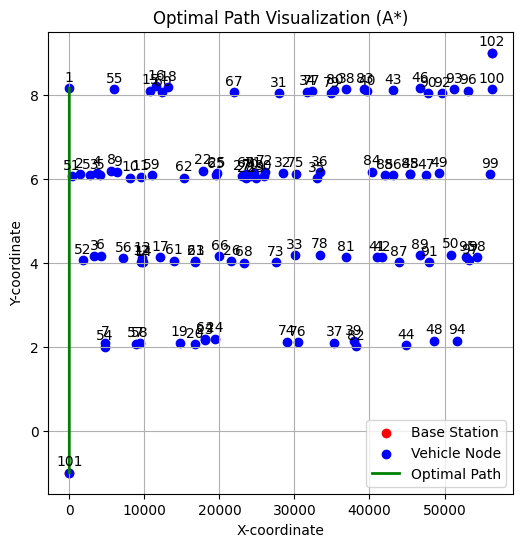

In [ ]:
# Perform A* algorithm for a specific car
source_node = 1
max_rate_astar, optimal_path_astar, optimal_latency_astar = find_optimal_path_astar(vehicle_graph, source_node, [101, 102])

print(f"Source Car Node: {source_node}")
# Check if optimal_path is not None:
if optimal_path_astar is not None:
    print(f"Optimal Path: {optimal_path_astar}")
    print(f"Max Transmission Rate: {max_rate_astar} Mbps")
    print(f"Latency: {optimal_latency_astar} ms")

    # Visualise the optimal path
    visualise_path_astar(vehicle_data, optimal_path_astar)
else:
    print("No valid path found to any base station.")

Source Car Node: 15
Optimal Path: [15, 8, 101]
Max Transmission Rate: 1 Mbps
Latency: 100 ms


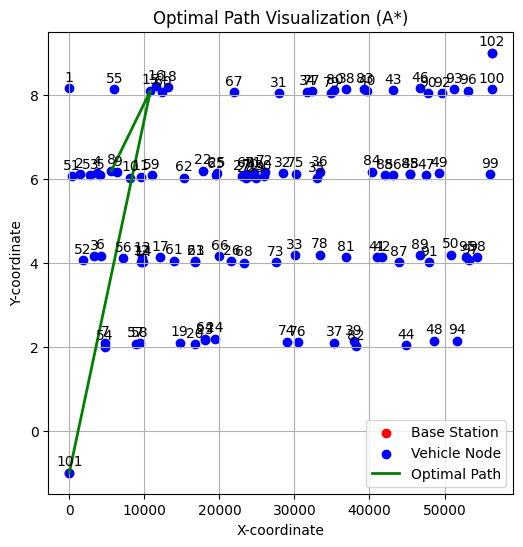

In [ ]:
# Perform A* algorithm for a specific car
source_node = 15
max_rate_astar, optimal_path_astar, optimal_latency_astar = find_optimal_path_astar(vehicle_graph, source_node, [101, 102])

print(f"Source Car Node: {source_node}")
# Check if optimal_path is not None:
if optimal_path_astar is not None:
    print(f"Optimal Path: {optimal_path_astar}")
    print(f"Max Transmission Rate: {max_rate_astar} Mbps")
    print(f"Latency: {optimal_latency_astar} ms")

    # Visualise the optimal path
    visualise_path_astar(vehicle_data, optimal_path_astar)
else:
    print("No valid path found to any base station.")

Source Car Node: 65
Optimal Path: [65, 61, 10, 53, 101]
Max Transmission Rate: 1 Mbps
Latency: 200 ms


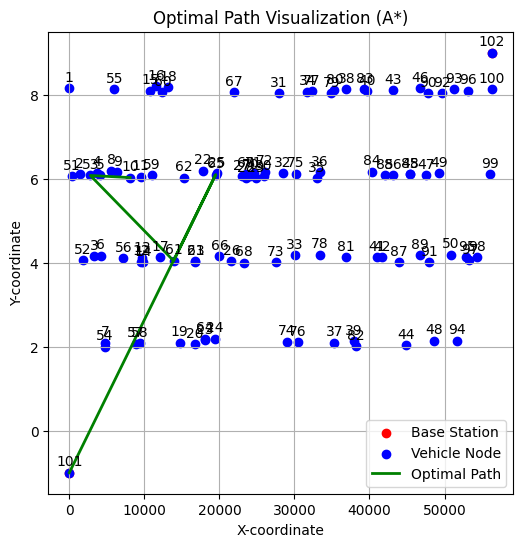

In [ ]:
# Perform A* algorithm for a specific car
source_node = 65
max_rate_astar, optimal_path_astar, optimal_latency_astar = find_optimal_path_astar(vehicle_graph, source_node, [101, 102])

print(f"Source Car Node: {source_node}")
# Check if optimal_path is not None:
if optimal_path_astar is not None:
    print(f"Optimal Path: {optimal_path_astar}")
    print(f"Max Transmission Rate: {max_rate_astar} Mbps")
    print(f"Latency: {optimal_latency_astar} ms")

    # Visualise the optimal path
    visualise_path_astar(vehicle_data, optimal_path_astar)
else:
    print("No valid path found to any base station.")

# Results and Discussion

Dijkstra's algorithm is a greedy algorithm utilised for solving the single-source shortest path problem on a graph without negative edge costs. It constructs a shortest path tree and is commonly applied in routing scenarios. The A-Star algorithm, on the other hand, is designed to find a path in a graph from an initial node to a goal node. It incorporates a heuristic estimate, denoted as h(x), which provides an approximation of the optimal route through a given node. The algorithm prioritises node visits based on these heuristic estimates.

In context of the given problem after implementation we have evaluated the model and compared them by taking output of three random cars such that, Car-1, Car-15 and Car-85.



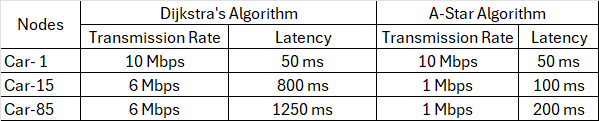

From the above table it is observed that both the algorithms are able to converge a optimal path. Dijkstra's algorithm has focused on high transmission rate and lacked behind in latency whereas A-Star algorithm has considered latency as priority and tried to achieve a path with minimum latency. The algorithm has given output with minimum latency but has compromised on transmission rate. For Car-1, both algorithms has given same output.

Both the algorithms can be re-optimised on basis of priority but in context of the problem as there was no priority defined so we haven't provided weightage to any of the parameter.

**Time Complexity:** Both the algorithms are time efficient and has taken very less time nearly 1 second for each car run.

# Conclusion

In conclusion, for this assignment we have implemented and evaluated two algorithms, namely Dijkstra's algorithm and the A-Star algorithm to find optimal path for given cars. The evaluation considered factors such as transmission rate and latency. The results demonstrated that both algorithms successfully converged to optimal paths, but with distinct prioritisation. Dijkstra's algorithm prioritised high transmission rates, whereas the A-Star algorithm prioritised minimising latency, sometimes compromising on transmission rate. Notably, for Car-1, both algorithms have produced the same output. The algorithms' performance could potentially be re-optimised based on specific priorities, but this was not pursued in the current context. Ultimately, the choice between Dijkstra's algorithm and the A-Star algorithm depends on the specific requirements of the routing scenario. If high transmission rates are crucial, Dijkstra's algorithm may be preferred, while situations emphasising minimal latency could benefit from the A-Star algorithm.

#Future Work

In future we will Investigate and develop hybrid algorithms that combine the strengths of both Dijkstra's and A-Star to achieve a balance between transmission rate and latency.

#References

* Dijkstra, E. W. (2022). A Note on Two Problems in Connexion with Graphs. In Edsger Wybe Dijkstra: His Life,Work, and Legacy (1st ed., pp. 287–290). Association for Computing Machinery. https://doi.org/10.1145/3544585.3544600  

* Dijkstra, E. W. (1959). A Note on Two Problems in Connexion with Graphs.

* Hart, P., Nilsson, N., & Raphael, B. (1968). A Formal Basis for the Heuristic Determination of Minimum Cost Paths. IEEE Transactions on Systems Science and Cybernetics, 4(2), 100–107. https://doi.org/10.1109/TSSC.1968.300136  

* Rachmawati, D., & Gustin, L. (2020). Analysis of Dijkstra’s Algorithm and A* Algorithm in Shortest Path Problem. Journal of Physics: Conference Series, 1566(1), 012061. https://doi.org/10.1088/1742-6596/1566/1/012061